In [1]:
# import all the relevant libraries for the logistic regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### check the present work directory

In [2]:
pwd

'C:\\Users\\swadh\\Desktop\\DOCS\\Lead score\\Final\\Lead Scoring Assignment'

### Importing and Merging Data

In [3]:
# read the csv and assign to a data frame 
df=pd.read_csv('Leads.csv')

In [4]:
# display the records in the data frame
df.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# check the shape of the data frame
df.shape

(9240, 37)

In [6]:
# decribles numeric columns properties like count,mean, std, min, max and etc
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Data Preparation

In [7]:
# check the null columns
df.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Do Not Email                                        0
Do Not Call                 

In [8]:
# drop the null columns with more the 3000 rows of null records
for col in df.columns:
    if df[col].isnull().sum()>3000:
        print('Drop columns :',col)
        df.drop(col,1,inplace=True)

Drop columns : Tags
Drop columns : Lead Quality
Drop columns : Asymmetrique Activity Index
Drop columns : Asymmetrique Profile Index
Drop columns : Asymmetrique Activity Score
Drop columns : Asymmetrique Profile Score


In [9]:
# check the list of null columns after the dropping columns with more than 3000 rows of nulls
df.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Number                                         0
Lead Origin                                         0
Do Not Email                                        0
Converted                                           0
Total Time Spent on Website                         0
Do Not Call                                         0
Last Notable Activity                               0
A free copy of Mastering The

In [10]:
df.drop(['City', 'Country'], axis=1,inplace=True)

In [11]:
df.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Number                                         0
Lead Origin                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
Total Time Spent on Website                         0
Last Notable Activity                               0
A free copy of Mastering The Interview              0
Search                                              0
Magazine                    

In [12]:
# check the data type and rows of the data frame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [13]:
# fidn the data variation in each  object column
for c in df.columns:
    print(df[c].astype('object').value_counts())
    print('\n\n========================================================\n\n')

7db723d3-56dc-40b8-bfad-31b17dc9a58f    1
e227a926-4169-4064-b8d2-01f776ee335b    1
9bc38ed8-604d-4b5e-8af3-e7aa1d773fba    1
ab5331cb-e85f-4782-931f-fb587eb2d1fd    1
24770483-60ad-4bb2-8101-303508ab0fdf    1
                                       ..
adf9abe1-3539-4bec-96d1-cb8db5487efc    1
11bd3f67-c7bf-4814-a7b5-80b121f4658d    1
aa708f29-9cb7-4959-a251-8aff9613b024    1
b8032ffc-6a6b-48cc-a156-c70666b496d6    1
285f9545-20a4-4da5-a3f5-bbd503b079fd    1
Name: Prospect ID, Length: 9240, dtype: int64




622584    1
611884    1
628050    1
628048    1
611662    1
         ..
584427    1
600810    1
608541    1
587128    1
655360    1
Name: Lead Number, Length: 9240, dtype: int64




Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64




Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Refere

Based on data variation analysis on each field it observed that the below listed columns can be dropped
'Do Not Call',
'Search',
'Lead Origin',
'How did you hear about X Education',
'Search',
'Magazine',
'Newspaper Article',
'X Education Forums',
'Newspaper',
'Digital Advertisement',
'Through Recommendations',
'Receive More Updates About Our Courses',
'Update me on Supply Chain Content',
'Get updates on DM Content',
'I agree to pay the amount through cheque'

In [14]:
df.drop(['Do Not Call',
'Search',
'Lead Origin',
'How did you hear about X Education',
'Search',
'Magazine',
'Newspaper Article',
'X Education Forums',
'Newspaper',
'Digital Advertisement',
'Through Recommendations',
'Receive More Updates About Our Courses',
'Update me on Supply Chain Content',
'Get updates on DM Content',
'I agree to pay the amount through cheque'], axis=1,inplace=True)

In [15]:
df.isnull().sum().sort_values(ascending=False)

Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Specialization                                   1438
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Last Notable Activity                               0
A free copy of Mastering The Interview              0
Total Time Spent on Website                         0
Converted                                           0
Do Not Email                                        0
Lead Number                                         0
Prospect ID                                         0
dtype: int64

In [16]:
# check the data type and rows of the data frame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 7802 

In [17]:
df['What is your current occupation'].isna().sum()

2690

### 'What is your current occupation' column seems important but there 2690 rows of null values in this column, so I choose to drop all these rows from the data frame

In [18]:
df.shape

(9240, 15)

In [19]:
df=df[~pd.isnull(df['What is your current occupation'])]

In [20]:
df.shape

(6550, 15)

In [21]:
df.isnull().sum().sort_values(ascending=False)

Page Views Per Visit                             130
TotalVisits                                      130
Last Activity                                    103
Lead Source                                       36
Lead Profile                                      19
What matters most to you in choosing a course     19
Specialization                                    18
Last Notable Activity                              0
A free copy of Mastering The Interview             0
What is your current occupation                    0
Total Time Spent on Website                        0
Converted                                          0
Do Not Email                                       0
Lead Number                                        0
Prospect ID                                        0
dtype: int64

### 'TotalVisits' column seems important but there 130 rows of null values in this column, so I choose to drop all these rows from the data frame

In [22]:
df=df[~pd.isnull(df['TotalVisits'])]

In [23]:
df.isnull().sum().sort_values(ascending=False)

Lead Source                                      29
Lead Profile                                     19
What matters most to you in choosing a course    19
Specialization                                   18
Last Notable Activity                             0
A free copy of Mastering The Interview            0
What is your current occupation                   0
Last Activity                                     0
Page Views Per Visit                              0
Total Time Spent on Website                       0
TotalVisits                                       0
Converted                                         0
Do Not Email                                      0
Lead Number                                       0
Prospect ID                                       0
dtype: int64

In [24]:
df.shape

(6420, 15)

#### 'Lead Source','Lead Profile','What matters most to you in choosing a course' and 'Specialization' columns seems important but there rows of null values in these column, so I choose to drop all these rows from the data frame

In [25]:
df=df[~pd.isnull(df['Lead Source'])]

In [26]:
df.shape

(6391, 15)

In [27]:
df.isnull().sum().sort_values(ascending=False)

Lead Profile                                     19
What matters most to you in choosing a course    19
Specialization                                   18
Last Notable Activity                             0
A free copy of Mastering The Interview            0
What is your current occupation                   0
Last Activity                                     0
Page Views Per Visit                              0
Total Time Spent on Website                       0
TotalVisits                                       0
Converted                                         0
Do Not Email                                      0
Lead Source                                       0
Lead Number                                       0
Prospect ID                                       0
dtype: int64

In [28]:
df=df[~pd.isnull(df['Lead Profile'])]

In [29]:
df.isnull().sum().sort_values(ascending=False)

Last Notable Activity                            0
A free copy of Mastering The Interview           0
Lead Profile                                     0
What matters most to you in choosing a course    0
What is your current occupation                  0
Specialization                                   0
Last Activity                                    0
Page Views Per Visit                             0
Total Time Spent on Website                      0
TotalVisits                                      0
Converted                                        0
Do Not Email                                     0
Lead Source                                      0
Lead Number                                      0
Prospect ID                                      0
dtype: int64

### Drop Prospect ID & Lean Number

In [30]:
df.drop(['Prospect ID','Lead Number'], axis=1,inplace=True)

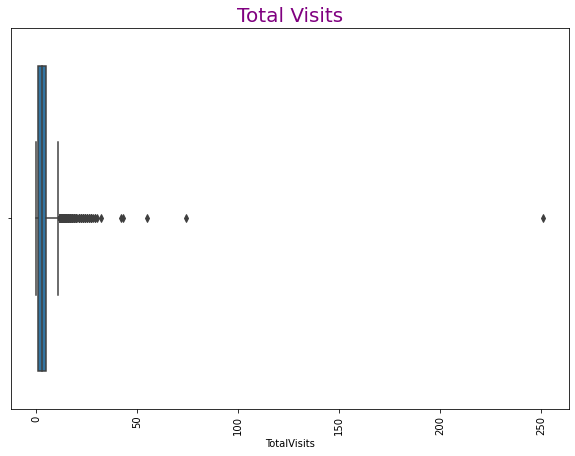

In [31]:
## Visualizing the box plots

plt.figure(figsize=[10,7])
sns.boxplot(df['TotalVisits'])
plt.title('Total Visits', fontdict={'color':'purple', 'size':20})
plt.xticks(rotation=90)

plt.show()

## We can clearly observe some of the outliers who visit the site more

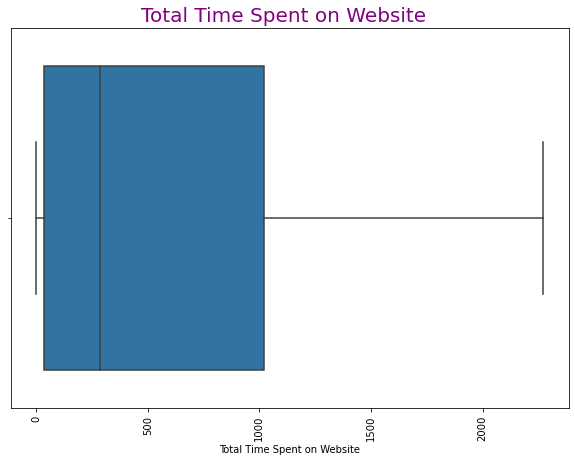

In [156]:
plt.figure(figsize=[10,7])
sns.boxplot(df['Total Time Spent on Website'])
plt.title('Total Time Spent on Website  ', fontdict={'color':'purple', 'size':20})
plt.xticks(rotation=90)

plt.show()

# There are no outliers for total time spent on website. Maximum individuals are under the 50 percentile.

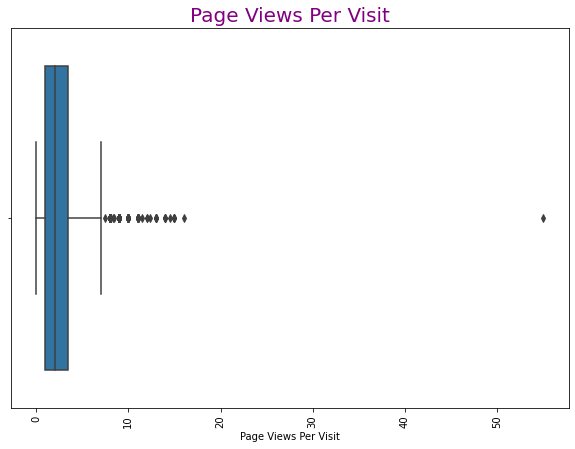

In [158]:
plt.figure(figsize=[10,7])
sns.boxplot(df['Page Views Per Visit'])
plt.title('Page Views Per Visit', fontdict={'color':'purple', 'size':20})
plt.xticks(rotation=90)

plt.show()

# There are some outliers in page views per visit.

# Dummy variable creation

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6372 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Source                                    6372 non-null   object 
 1   Do Not Email                                   6372 non-null   object 
 2   Converted                                      6372 non-null   int64  
 3   TotalVisits                                    6372 non-null   float64
 4   Total Time Spent on Website                    6372 non-null   int64  
 5   Page Views Per Visit                           6372 non-null   float64
 6   Last Activity                                  6372 non-null   object 
 7   Specialization                                 6372 non-null   object 
 8   What is your current occupation                6372 non-null   object 
 9   What matters most to you in choosing a course  6372 

In [33]:
df.head()

,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
0,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Better Career Prospects,Select,No,Modified
1,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Better Career Prospects,Select,No,Email Opened
2,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Potential Lead,Yes,Email Opened
3,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,Select,No,Modified
4,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Better Career Prospects,Select,No,Modified


In [34]:
df.columns

Index(['Lead Source', 'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Lead Profile',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Converting some binary variables (Yes/No) to 0/1

In [35]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [36]:
df['Do Not Email'].astype('object').value_counts()

0    5938
1     434
Name: Do Not Email, dtype: int64

In [37]:
df['A free copy of Mastering The Interview'].astype('object').value_counts()

0    4201
1    2171
Name: A free copy of Mastering The Interview, dtype: int64

In [38]:
df.head()

,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
0,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Better Career Prospects,Select,0,Modified
1,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,Better Career Prospects,Select,0,Email Opened
2,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Potential Lead,1,Email Opened
3,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,Select,0,Modified
4,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Better Career Prospects,Select,0,Modified


### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [39]:
df.columns

Index(['Lead Source', 'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Lead Profile',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [40]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Lead Source', 'Last Activity', 'What is your current occupation', 'What matters most to you in choosing a course','Lead Profile','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [41]:
df.shape

(6372, 68)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6372 entries, 0 to 9239
Data columns (total 68 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Lead Source                                                              6372 non-null   object 
 1   Do Not Email                                                             6372 non-null   int64  
 2   Converted                                                                6372 non-null   int64  
 3   TotalVisits                                                              6372 non-null   float64
 4   Total Time Spent on Website                                              6372 non-null   int64  
 5   Page Views Per Visit                                                     6372 non-null   float64
 6   Last Activity                                                           

In [43]:
# Creating dummy variables for the variable 'Specialization'
temp = pd.get_dummies(df['Specialization'], prefix='Specialization')
# Dropping MultipleLines_No phone service column
temp = temp.drop(['Specialization_Select'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,temp], axis=1)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6372 entries, 0 to 9239
Data columns (total 86 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Lead Source                                                              6372 non-null   object 
 1   Do Not Email                                                             6372 non-null   int64  
 2   Converted                                                                6372 non-null   int64  
 3   TotalVisits                                                              6372 non-null   float64
 4   Total Time Spent on Website                                              6372 non-null   int64  
 5   Page Views Per Visit                                                     6372 non-null   float64
 6   Last Activity                                                           

In [45]:
df.shape

(6372, 86)

#### Dropping the repeated variables

In [46]:
# We have created dummies for the below variables, so we can drop them
Dummy_columns=['Lead Source', 'Last Activity', 'What is your current occupation', 'What matters most to you in choosing a course','Lead Profile','Last Notable Activity','Specialization']
df = df.drop(Dummy_columns,1)

In [47]:
df.shape

(6372, 79)

In [48]:
df.isnull().sum().sort_values(ascending=False)

Specialization_Travel and Tourism                 0
Last Activity_Had a Phone Conversation            0
Last Activity_Converted to Lead                   0
Last Activity_Email Bounced                       0
Last Activity_Email Link Clicked                  0
                                                 ..
Last Notable Activity_Had a Phone Conversation    0
Last Notable Activity_Modified                    0
Last Notable Activity_Olark Chat Conversation     0
Last Notable Activity_Page Visited on Website     0
Do Not Email                                      0
Length: 79, dtype: int64

In [49]:
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Checking for Outliers in numeric columns

In [50]:
df.columns

Index(['Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing',
       'Lead Source_testone', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_

In [51]:
num_df=df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [52]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6372.000000,6372.000000,6372.000000
mean,3.606717,535.279190,2.479565
std,4.852274,565.402288,2.166345
min,0.000000,0.000000,0.000000
25%,1.000000,34.000000,1.000000
50%,3.000000,287.000000,2.000000
75%,5.000000,1022.250000,3.500000
90%,8.000000,1428.900000,5.000000
95%,10.000000,1592.450000,6.000000
99%,17.290000,1849.290000,9.000000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
# Putting feature variable to X
X = df.drop(['Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
X.shape

(6372, 78)

In [56]:
# fidn the data variation in each  object column after dummyfication
for c in X.columns:
    print(X[c].astype('object').value_counts())
    print('\n\n========================================================\n\n')

0    5938
1     434
Name: Do Not Email, dtype: int64




0.0      1347
2.0      1225
3.0       937
4.0       823
5.0       578
6.0       337
1.0       260
7.0       225
8.0       162
9.0       128
10.0       76
11.0       70
13.0       39
12.0       31
14.0       28
16.0       16
15.0       14
17.0       12
18.0       12
20.0       10
19.0        6
27.0        5
21.0        5
23.0        5
22.0        3
24.0        3
25.0        3
26.0        2
29.0        2
42.0        1
55.0        1
43.0        1
74.0        1
32.0        1
30.0        1
28.0        1
251.0       1
Name: TotalVisits, dtype: int64




0       1351
60        15
127       14
87        13
74        13
        ... 
636        1
1339       1
1338       1
1336       1
2272       1
Name: Total Time Spent on Website, Length: 1613, dtype: int64




0.00     1347
2.00     1324
3.00      874
4.00      659
1.00      423
         ... 
11.50       1
1.86        1
6.33        1
2.56        1
1.64        1
Name: Page Views Per Visit

Name: Specialization_Retail Management, dtype: int64




0    6315
1      57
Name: Specialization_Rural and Agribusiness, dtype: int64




0    6347
1      25
Name: Specialization_Services Excellence, dtype: int64




0    6097
1     275
Name: Specialization_Supply Chain Management, dtype: int64




0    6223
1     149
Name: Specialization_Travel and Tourism, dtype: int64






In [57]:
X_sum=X.sum(axis=0)

X_sum.sort_values(ascending=True).head(50)

What matters most to you in choosing a course_Other                          1.0
Lead Source_WeLearn                                                          1.0
Last Activity_Visited Booth in Tradeshow                                     1.0
What matters most to you in choosing a course_Flexibility & Convenience      1.0
Last Notable Activity_Email Received                                         1.0
Last Notable Activity_View in browser link Clicked                           1.0
Lead Source_Press_Release                                                    1.0
Lead Source_Pay per Click Ads                                                1.0
Lead Source_testone                                                          1.0
Lead Source_Social Media                                                     2.0
Lead Source_Live Chat                                                        2.0
Last Notable Activity_Email Marked Spam                                      2.0
Last Activity_Email Received

In [58]:
## Droping the columns whose data variation is very very minimal (columns total with value less than 100)
X.drop(['What matters most to you in choosing a course_Other',
'Lead Source_WeLearn',
'Last Activity_Visited Booth in Tradeshow',
'What matters most to you in choosing a course_Flexibility & Convenience',
'Last Notable Activity_Email Received',
'Last Notable Activity_View in browser link Clicked',
'Lead Source_Press_Release',
'Lead Source_Pay per Click Ads',
'Lead Source_testone',
'Lead Source_Social Media',
'Lead Source_Live Chat',
'Last Notable Activity_Email Marked Spam',
'Last Activity_Email Received',
'Last Activity_Email Marked Spam',
'Lead Source_bing',
'Last Activity_View in browser link Clicked',
'What is your current occupation_Housewife',
'Last Notable Activity_Had a Phone Conversation',
'What is your current occupation_Other',
'Lead Profile_Lateral Student',
'Last Notable Activity_Unreachable',
'Last Activity_Had a Phone Conversation',
'Specialization_Services Excellence',
'Lead Source_Facebook',
'Last Notable Activity_Unsubscribed',
'Last Activity_Unsubscribed',
'Specialization_E-Business',
'Last Notable Activity_Email Bounced',
'Specialization_Rural and Agribusiness',
'Last Activity_Unreachable',
'Lead Source_Referral Sites',
'Last Notable Activity_Olark Chat Conversation',
'Specialization_Retail Management',
'Specialization_E-COMMERCE',
'Last Activity_Form Submitted on Website',
'Specialization_Hospitality Management'], axis=1,inplace=True)

In [59]:
X_sum=X.sum(axis=0)

X_sum.sort_values(ascending=True).head(50)

Last Notable Activity_Email Link Clicked                    110.00
Specialization_Healthcare Management                        122.00
Lead Source_Welingak Website                                129.00
Specialization_International Business                       136.00
Specialization_Travel and Tourism                           149.00
Specialization_Media and Advertising                        161.00
Last Activity_Email Bounced                                 175.00
Last Activity_Email Link Clicked                            178.00
What is your current occupation_Student                     193.00
Last Notable Activity_Page Visited on Website               212.00
Lead Profile_Student of SomeSchool                          240.00
Specialization_Banking, Investment And Insurance            266.00
Specialization_Supply Chain Management                      275.00
Specialization_IT Projects Management                       278.00
Last Activity_Converted to Lead                             29

In [60]:
df_corr=X.corr()
corr_list=df_corr.unstack().sort_values()
corr_list[(corr_list>0.6) & (corr_list<1)].head(30)

Last Activity_Page Visited on Website          Last Notable Activity_Page Visited on Website    0.693083
Last Notable Activity_Page Visited on Website  Last Activity_Page Visited on Website            0.693083
Last Notable Activity_Email Link Clicked       Last Activity_Email Link Clicked                 0.781836
Last Activity_Email Link Clicked               Last Notable Activity_Email Link Clicked         0.781836
Last Activity_Email Opened                     Last Notable Activity_Email Opened               0.866181
Last Notable Activity_Email Opened             Last Activity_Email Opened                       0.866181
Last Activity_SMS Sent                         Last Notable Activity_SMS Sent                   0.890584
Last Notable Activity_SMS Sent                 Last Activity_SMS Sent                           0.890584
dtype: float64

### Dropping highly correlated dummy variables

In [61]:
# Let's see the correlation matrix that have values more than 0.6
X= X.drop(['Last Activity_Page Visited on Website',
'Last Notable Activity_Page Visited on Website',
'Last Notable Activity_Email Link Clicked',
'Last Activity_Email Link Clicked',
'Last Activity_Email Opened',
'Last Notable Activity_Email Opened',
'Last Activity_SMS Sent',
'Last Notable Activity_SMS Sent'], 1)

In [62]:
# Putting response variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [63]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling and splitting data into Train and Test datasets

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [65]:
# scaler = StandardScaler()
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()



,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,...,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4170,0,0.015936,0.408891,0.2500,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6812,0,0.063745,0.539613,0.1250,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7717,0,0.000000,0.000000,0.0000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
207,0,0.019920,0.157570,0.3125,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2044,0,0.007968,0.163292,0.1250,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,...,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8402,0,0.007968,0.621479,0.12500,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8782,0,0.019920,0.246039,0.31250,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6199,0,0.011952,0.414613,0.09375,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6482,0,0.000000,0.000000,0.00000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
6026,0,0.000000,0.000000,0.00000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [67]:
### Checking the Converted Rate
Converted_rate = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted_rate

48.10106716886378

### Looking at Correlations

In [68]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

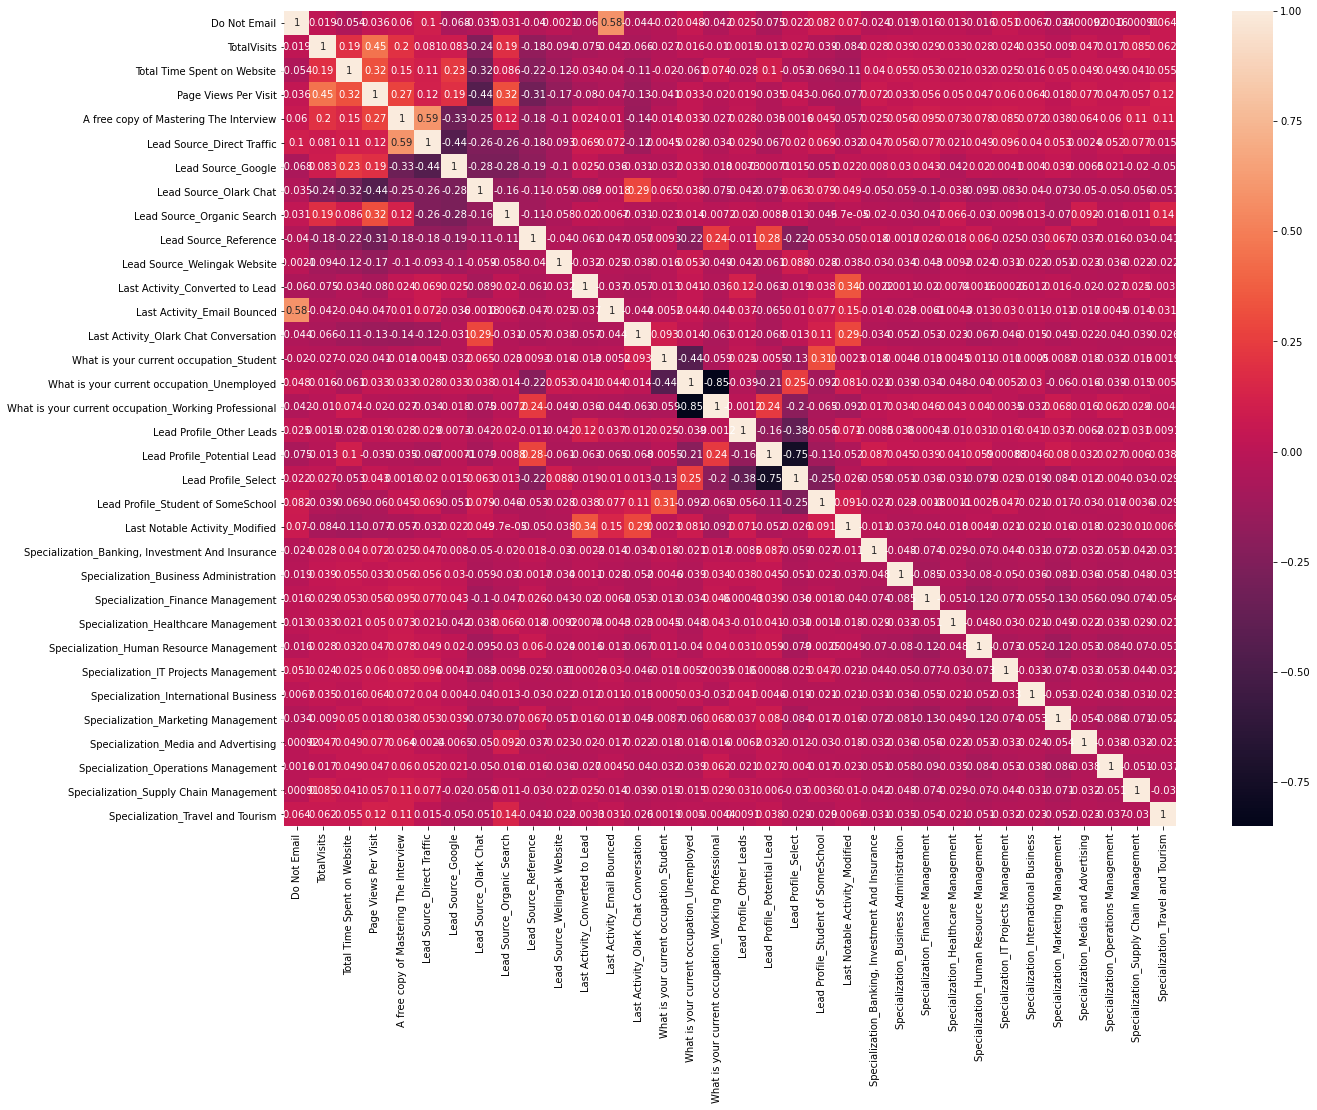

In [69]:
plt.figure(figsize = (20,15))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Model Building

In [70]:
import statsmodels.api as sm

In [71]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4425
Model Family:                Binomial   Df Model:                           34
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1915.4
Date:                Tue, 07 Sep 2021   Deviance:                       3830.8
Time:                        21:02:45   Pearson chi2:                 4.84e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   23.5859   1.24e+04      0.002      0.998   -2.44e+04    2.44e+04
Do Not Email                                            -0.8797      0.224     -3.922      0.000      -1.319      -0.440
TotalVisits                                              9.3029      3.434      2.709      0.007       2.572      16.033
Total Time Spent on Website                              4.4075      0.195     22.644      0.000       4.026       4.789
Page Views Per Visit                                    -1.4812      0.468     -3.163      0.002      -2.399      -0.563
A free copy of Mastering The Interview                  -0.1390      0.119     -1.170      0.242      -0.372       0.094
Lead Source_Direct Traffic                              -0.6031      0.307     -1.962      0.050      -1.205      -0.001
Lead Source_Google                                      -0.1790      0.297     -0.603      0.547      -0.761       0.403
Lead Source_Olark Chat                                   1.1381      0.313      3.640      0.000       0.525       1.751
Lead Source_Organic Search                              -0.2567      0.311     -0.827      0.408      -0.865       0.352
Lead Source_Reference                                    2.8798      0.381      7.550      0.000       2.132       3.627
Lead Source_Welingak Website                             5.9955      1.052      5.699      0.000       3.933       8.058
Last Activity_Converted to Lead                         -0.6115      0.252     -2.427      0.015      -1.105      -0.118
Last Activity_Email Bounced                             -1.0064      0.420     -2.395      0.017      -1.830      -0.183
Last Activity_Olark Chat Conversation                   -0.9194      0.203     -4.535      0.000      -1.317      -0.522
What is your current occupation_Student                 -1.1348      0.687     -1.651      0.099      -2.482       0.213
What is your current occupation_Unemployed              -1.5903      0.634     -2.510      0.012      -2.832      -0.349
What is your current occupation_Working Professional     0.6742      0.660      1.022      0.307      -0.619       1.967
Lead Profile_Other Leads                               -23.3869   1.24e+04     -0.002      0.999   -2.44e+04    2.44e+04
Lead Profile_Potential Lead                            -21.8805   1.24e+04     -0.002      0.999   -2.44e+04    2.44e+04
Lead Profile_Select                                    -23.2960   1.24e+04     -0.002      0.999   -2.44e+04    2.44e+04
Lead Profile_Student of SomeSchool                     -26.7663   1.24e+04     -0.002      0.998   -2.44e+04    2.44e+04
Last Notable Activity_Modified                          -0

In [72]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4460 entries, 4170 to 8219
Data columns (total 34 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          4460 non-null   int64  
 1   TotalVisits                                           4460 non-null   float64
 2   Total Time Spent on Website                           4460 non-null   float64
 3   Page Views Per Visit                                  4460 non-null   float64
 4   A free copy of Mastering The Interview                4460 non-null   int64  
 5   Lead Source_Direct Traffic                            4460 non-null   uint8  
 6   Lead Source_Google                                    4460 non-null   uint8  
 7   Lead Source_Olark Chat                                4460 non-null   uint8  
 8   Lead Source_Organic Search                            4

In [73]:
# drop variables whose p values is above 0.05
X_train=X_train.drop(['Lead Profile_Other Leads',
'Lead Profile_Potential Lead',
'Lead Profile_Select',
'Lead Profile_Student of SomeSchool'],1)

In [74]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4429
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.9
Date:                Tue, 07 Sep 2021   Deviance:                       4157.8
Time:                        21:02:45   Pearson chi2:                 4.55e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1727      0.684      0.252      0.801      -1.168       1.514
Do Not Email                                            -0.9505      0.216     -4.409      0.000      -1.373      -0.528
TotalVisits                                             10.0943      3.369      2.996      0.003       3.491      16.697
Total Time Spent on Website                              4.4450      0.187     23.802      0.000       4.079       4.811
Page Views Per Visit                                    -1.4707      0.445     -3.304      0.001      -2.343      -0.598
A free copy of Mastering The Interview                  -0.2288      0.114     -2.015      0.044      -0.451      -0.006
Lead Source_Direct Traffic                              -0.6539      0.299     -2.187      0.029      -1.240      -0.068
Lead Source_Google                                      -0.1936      0.289     -0.671      0.502      -0.759       0.372
Lead Source_Olark Chat                                   1.1194      0.304      3.687      0.000       0.524       1.714
Lead Source_Organic Search                              -0.2077      0.302     -0.689      0.491      -0.799       0.384
Lead Source_Reference                                    3.3283      0.371      8.965      0.000       2.601       4.056
Lead Source_Welingak Website                             5.9484      1.049      5.669      0.000       3.892       8.005
Last Activity_Converted to Lead                         -0.7314      0.238     -3.078      0.002      -1.197      -0.266
Last Activity_Email Bounced                             -1.0927      0.412     -2.651      0.008      -1.901      -0.285
Last Activity_Olark Chat Conversation                   -0.9974      0.193     -5.155      0.000      -1.377      -0.618
What is your current occupation_Student                 -1.5184      0.652     -2.328      0.020      -2.797      -0.240
What is your current occupation_Unemployed              -1.3871      0.614     -2.259      0.024      -2.591      -0.184
What is your current occupation_Working Professional     1.0651      0.641      1.661      0.097      -0.192       2.322
Last Notable Activity_Modified                          -0.8427      0.098     -8.632      0.000      -1.034      -0.651
Specialization_Banking, Investment And Insurance         0.9177      0.209      4.389      0.000       0.508       1.327
Specialization_Business Administration                   0.3143      0.188      1.672      0.095      -0.054       0.683
Specialization_Finance Management                        0.4065      0.143      2.852      0.004       0.127       0.686
Specialization_Healthcare Management                     0

In [75]:
# drop variables whose p values is above 0.05
X_train=X_train.drop(['Lead Source_Google','Lead Source_Organic Search'],1)

In [76]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4431
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Tue, 07 Sep 2021   Deviance:                       4158.3
Time:                        21:02:46   Pearson chi2:                 4.55e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0125      0.630     -0.020      0.984      -1.246       1.221
Do Not Email                                            -0.9524      0.215     -4.421      0.000      -1.375      -0.530
TotalVisits                                             10.0662      3.363      2.994      0.003       3.476      16.657
Total Time Spent on Website                              4.4378      0.186     23.840      0.000       4.073       4.803
Page Views Per Visit                                    -1.4884      0.441     -3.377      0.001      -2.352      -0.625
A free copy of Mastering The Interview                  -0.2328      0.108     -2.159      0.031      -0.444      -0.021
Lead Source_Direct Traffic                              -0.4608      0.111     -4.163      0.000      -0.678      -0.244
Lead Source_Olark Chat                                   1.3019      0.147      8.866      0.000       1.014       1.590
Lead Source_Reference                                    3.5111      0.257     13.656      0.000       3.007       4.015
Lead Source_Welingak Website                             6.1305      1.015      6.038      0.000       4.140       8.120
Last Activity_Converted to Lead                         -0.7335      0.237     -3.094      0.002      -1.198      -0.269
Last Activity_Email Bounced                             -1.0962      0.412     -2.661      0.008      -1.904      -0.289
Last Activity_Olark Chat Conversation                   -0.9961      0.193     -5.151      0.000      -1.375      -0.617
What is your current occupation_Student                 -1.5163      0.652     -2.326      0.020      -2.794      -0.239
What is your current occupation_Unemployed              -1.3841      0.614     -2.255      0.024      -2.587      -0.181
What is your current occupation_Working Professional     1.0672      0.641      1.665      0.096      -0.189       2.323
Last Notable Activity_Modified                          -0.8404      0.098     -8.614      0.000      -1.032      -0.649
Specialization_Banking, Investment And Insurance         0.9158      0.208      4.396      0.000       0.507       1.324
Specialization_Business Administration                   0.3107      0.186      1.666      0.096      -0.055       0.676
Specialization_Finance Management                        0.4043      0.141      2.873      0.004       0.128       0.680
Specialization_Healthcare Management                     0.8078      0.297      2.722      0.006       0.226       1.389
Specialization_Human Resource Management                 0.3381      0.145      2.327      0.020       0.053       0.623
Specialization_IT Projects Management                    0

In [77]:
# drop variables whose p values is above 0.05
X_train=X_train.drop(['Specialization_International Business',
'What is your current occupation_Working Professional',
'Specialization_Business Administration'],1)

In [78]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4434
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2082.3
Date:                Tue, 07 Sep 2021   Deviance:                       4164.7
Time:                        21:02:46   Pearson chi2:                 4.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                1.0548      0.219      4.821      0.000       0.626       1.484
Do Not Email                                        -0.9537      0.216     -4.421      0.000      -1.376      -0.531
TotalVisits                                         10.0504      3.367      2.985      0.003       3.451      16.650
Total Time Spent on Website                          4.4424      0.186     23.897      0.000       4.078       4.807
Page Views Per Visit                                -1.4523      0.440     -3.300      0.001      -2.315      -0.590
A free copy of Mastering The Interview              -0.2024      0.107     -1.893      0.058      -0.412       0.007
Lead Source_Direct Traffic                          -0.4558      0.111     -4.117      0.000      -0.673      -0.239
Lead Source_Olark Chat                               1.2683      0.146      8.712      0.000       0.983       1.554
Lead Source_Reference                                3.5101      0.257     13.664      0.000       3.007       4.014
Lead Source_Welingak Website                         6.0764      1.015      5.987      0.000       4.087       8.066
Last Activity_Converted to Lead                     -0.7252      0.236     -3.072      0.002      -1.188      -0.263
Last Activity_Email Bounced                         -1.0971      0.410     -2.676      0.007      -1.901      -0.293
Last Activity_Olark Chat Conversation               -1.0118      0.193     -5.255      0.000      -1.389      -0.634
What is your current occupation_Student             -2.5246      0.287     -8.786      0.000      -3.088      -1.961
What is your current occupation_Unemployed          -2.3916      0.187    -12.780      0.000      -2.758      -2.025
Last Notable Activity_Modified                      -0.8460      0.097     -8.681      0.000      -1.037      -0.655
Specialization_Banking, Investment And Insurance     0.8369      0.204      4.103      0.000       0.437       1.237
Specialization_Finance Management                    0.3250      0.134      2.419      0.016       0.062       0.588
Specialization_Healthcare Management                 0.7141      0.294      2.428      0.015       0.138       1.290
Specialization_Human Resource Management             0.2568      0.139      1.847      0.065      -0.016       0.529
Specialization_IT Projects Management                0.4095      0.203      2.022      0.043       0.013       0.806
Specialization_Marketing Management                  0.5074      0.136      3.721      0.000       0.240       0.775
Specialization_Media and Advertising                 0.3483      0.254      1.371      0.170      -0.150       0.846
Specialization_Operations Management     

In [79]:
# drop variables whose p values is above 0.05
X_train=X_train.drop(['Specialization_Media and Advertising',
'Specialization_Travel and Tourism'],1)

In [80]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4436
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2084.3
Date:                Tue, 07 Sep 2021   Deviance:                       4168.6
Time:                        21:02:46   Pearson chi2:                 4.54e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                1.0926      0.217      5.028      0.000       0.667       1.518
Do Not Email                                        -0.9367      0.215     -4.349      0.000      -1.359      -0.515
TotalVisits                                         10.0587      3.376      2.980      0.003       3.443      16.675
Total Time Spent on Website                          4.4537      0.186     23.967      0.000       4.090       4.818
Page Views Per Visit                                -1.3823      0.438     -3.155      0.002      -2.241      -0.524
A free copy of Mastering The Interview              -0.1669      0.105     -1.585      0.113      -0.373       0.040
Lead Source_Direct Traffic                          -0.4680      0.111     -4.235      0.000      -0.685      -0.251
Lead Source_Olark Chat                               1.2541      0.145      8.642      0.000       0.970       1.539
Lead Source_Reference                                3.5091      0.257     13.673      0.000       3.006       4.012
Lead Source_Welingak Website                         6.0516      1.015      5.964      0.000       4.063       8.040
Last Activity_Converted to Lead                     -0.7295      0.236     -3.089      0.002      -1.192      -0.267
Last Activity_Email Bounced                         -1.1017      0.411     -2.683      0.007      -1.906      -0.297
Last Activity_Olark Chat Conversation               -1.0216      0.192     -5.311      0.000      -1.399      -0.645
What is your current occupation_Student             -2.5367      0.287     -8.844      0.000      -3.099      -1.975
What is your current occupation_Unemployed          -2.4058      0.187    -12.882      0.000      -2.772      -2.040
Last Notable Activity_Modified                      -0.8425      0.097     -8.649      0.000      -1.033      -0.652
Specialization_Banking, Investment And Insurance     0.7844      0.202      3.881      0.000       0.388       1.180
Specialization_Finance Management                    0.2716      0.131      2.066      0.039       0.014       0.529
Specialization_Healthcare Management                 0.6517      0.292      2.232      0.026       0.079       1.224
Specialization_Human Resource Management             0.2023      0.136      1.486      0.137      -0.065       0.469
Specialization_IT Projects Management                0.3540      0.200      1.766      0.077      -0.039       0.747
Specialization_Marketing Management                  0.4568      0.134      3.413      0.001       0.195       0.719
Specialization_Operations Management                 0.3644      0.173      2.104      0.035       0.025       0.704
Specialization_Supply Chain Management   

In [81]:
# drop variables whose p values is above 0.05
X_train=X_train.drop(['Specialization_Human Resource Management',
'A free copy of Mastering The Interview'],1)

In [82]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4438
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2086.5
Date:                Tue, 07 Sep 2021   Deviance:                       4172.9
Time:                        21:02:46   Pearson chi2:                 4.52e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                1.1285      0.216      5.231      0.000       0.706       1.551
Do Not Email                                        -0.9393      0.215     -4.367      0.000      -1.361      -0.518
TotalVisits                                          9.4844      3.321      2.856      0.004       2.976      15.993
Total Time Spent on Website                          4.4619      0.186     24.024      0.000       4.098       4.826
Page Views Per Visit                                -1.4097      0.436     -3.232      0.001      -2.265      -0.555
Lead Source_Direct Traffic                          -0.5519      0.093     -5.961      0.000      -0.733      -0.370
Lead Source_Olark Chat                               1.2402      0.145      8.581      0.000       0.957       1.523
Lead Source_Reference                                3.5324      0.256     13.782      0.000       3.030       4.035
Lead Source_Welingak Website                         6.0372      1.015      5.951      0.000       4.049       8.026
Last Activity_Converted to Lead                     -0.7293      0.236     -3.091      0.002      -1.192      -0.267
Last Activity_Email Bounced                         -1.1113      0.411     -2.703      0.007      -1.917      -0.306
Last Activity_Olark Chat Conversation               -1.0294      0.192     -5.355      0.000      -1.406      -0.653
What is your current occupation_Student             -2.5429      0.286     -8.882      0.000      -3.104      -1.982
What is your current occupation_Unemployed          -2.4201      0.187    -12.965      0.000      -2.786      -2.054
Last Notable Activity_Modified                      -0.8382      0.097     -8.608      0.000      -1.029      -0.647
Specialization_Banking, Investment And Insurance     0.7399      0.200      3.705      0.000       0.348       1.131
Specialization_Finance Management                    0.2142      0.127      1.682      0.093      -0.035       0.464
Specialization_Healthcare Management                 0.5686      0.289      1.970      0.049       0.003       1.134
Specialization_IT Projects Management                0.2948      0.198      1.491      0.136      -0.093       0.682
Specialization_Marketing Management                  0.4072      0.130      3.123      0.002       0.152       0.663
Specialization_Operations Management                 0.3091      0.170      1.814      0.070      -0.025       0.643
Specialization_Supply Chain Management               0.3814      0.198      1.922      0.055      -0.008       0.770
====================================================================================================================
"""

In [83]:
# drop variables whose p values is above 0.05
X_train=X_train.drop(['Specialization_IT Projects Management',
'Specialization_Finance Management'],1)

In [84]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4440
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2088.7
Date:                Tue, 07 Sep 2021   Deviance:                       4177.4
Time:                        21:02:46   Pearson chi2:                 4.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                1.1875      0.214      5.557      0.000       0.769       1.606
Do Not Email                                        -0.9332      0.215     -4.336      0.000      -1.355      -0.511
TotalVisits                                          9.3486      3.325      2.812      0.005       2.832      15.865
Total Time Spent on Website                          4.4577      0.185     24.043      0.000       4.094       4.821
Page Views Per Visit                                -1.3756      0.436     -3.156      0.002      -2.230      -0.521
Lead Source_Direct Traffic                          -0.5274      0.092     -5.747      0.000      -0.707      -0.348
Lead Source_Olark Chat                               1.2069      0.143      8.414      0.000       0.926       1.488
Lead Source_Reference                                3.5250      0.256     13.768      0.000       3.023       4.027
Lead Source_Welingak Website                         5.9920      1.014      5.908      0.000       4.004       7.980
Last Activity_Converted to Lead                     -0.7386      0.236     -3.129      0.002      -1.201      -0.276
Last Activity_Email Bounced                         -1.1247      0.411     -2.735      0.006      -1.931      -0.319
Last Activity_Olark Chat Conversation               -1.0382      0.192     -5.415      0.000      -1.414      -0.662
What is your current occupation_Student             -2.5542      0.286     -8.934      0.000      -3.115      -1.994
What is your current occupation_Unemployed          -2.4292      0.186    -13.033      0.000      -2.795      -2.064
Last Notable Activity_Modified                      -0.8435      0.097     -8.670      0.000      -1.034      -0.653
Specialization_Banking, Investment And Insurance     0.6797      0.197      3.443      0.001       0.293       1.067
Specialization_Healthcare Management                 0.5093      0.287      1.774      0.076      -0.053       1.072
Specialization_Marketing Management                  0.3493      0.127      2.744      0.006       0.100       0.599
Specialization_Operations Management                 0.2489      0.168      1.484      0.138      -0.080       0.578
Specialization_Supply Chain Management               0.3205      0.196      1.634      0.102      -0.064       0.705
====================================================================================================================
"""

In [85]:
# drop variables whose p values is above 0.05
X_train=X_train.drop(['Specialization_Operations Management',
'Specialization_Supply Chain Management','Specialization_Healthcare Management'],1)

In [86]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4443
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2092.3
Date:                Tue, 07 Sep 2021   Deviance:                       4184.6
Time:                        21:02:46   Pearson chi2:                 4.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                1.2388      0.212      5.834      0.000       0.823       1.655
Do Not Email                                        -0.9229      0.215     -4.290      0.000      -1.345      -0.501
TotalVisits                                          9.3849      3.325      2.822      0.005       2.867      15.903
Total Time Spent on Website                          4.4541      0.185     24.059      0.000       4.091       4.817
Page Views Per Visit                                -1.3003      0.434     -2.997      0.003      -2.151      -0.450
Lead Source_Direct Traffic                          -0.5050      0.091     -5.539      0.000      -0.684      -0.326
Lead Source_Olark Chat                               1.1954      0.143      8.357      0.000       0.915       1.476
Lead Source_Reference                                3.5331      0.256     13.808      0.000       3.032       4.035
Lead Source_Welingak Website                         5.9719      1.014      5.889      0.000       3.984       7.959
Last Activity_Converted to Lead                     -0.7361      0.236     -3.124      0.002      -1.198      -0.274
Last Activity_Email Bounced                         -1.1334      0.411     -2.756      0.006      -1.939      -0.327
Last Activity_Olark Chat Conversation               -1.0467      0.191     -5.473      0.000      -1.421      -0.672
What is your current occupation_Student             -2.5884      0.285     -9.088      0.000      -3.147      -2.030
What is your current occupation_Unemployed          -2.4553      0.186    -13.211      0.000      -2.820      -2.091
Last Notable Activity_Modified                      -0.8392      0.097     -8.633      0.000      -1.030      -0.649
Specialization_Banking, Investment And Insurance     0.6278      0.196      3.200      0.001       0.243       1.012
Specialization_Marketing Management                  0.3001      0.126      2.386      0.017       0.054       0.547
====================================================================================================================
"""

### Feature Selection Using RFE

In [87]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [88]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 25 variables as output
rfe = rfe.fit(X_train, y_train)

In [89]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [90]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('Last Notable Activity_Modified', True, 1),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_Marketing Management', True, 1)]

In [91]:
col = X_train.columns[rfe.support_]

In [92]:
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Source_Direct Traffic',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Modified',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Marketing Management'],
      dtype='object')

#### Checking VIFs

In [93]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,4.77
3,Page Views Per Visit,3.72
2,Total Time Spent on Website,2.10
1,TotalVisits,1.88
13,Last Notable Activity_Modified,1.87
0,Do Not Email,1.67
5,Lead Source_Olark Chat,1.66
9,Last Activity_Email Bounced,1.63
4,Lead Source_Direct Traffic,1.55
10,Last Activity_Olark Chat Conversation,1.32


##### Assessing the model with StatsModels

In [95]:
X_train_sm = sm.add_constant(X_train)
res = logm1.fit()

In [96]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:15]

4170    0.481068
6812    0.753564
7717    0.494731
207     0.171749
2044    0.104120
3330    0.702904
6498    0.030486
2085    0.991468
6260    0.115054
19      0.119704
4647    0.025342
5380    0.015902
9217    0.494731
5132    0.317541
6372    0.504384
dtype: float64

In [97]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:15]

array([0.48106786, 0.75356358, 0.49473138, 0.17174877, 0.10411972,
       0.70290374, 0.03048589, 0.99146804, 0.11505401, 0.11970432,
       0.0253421 , 0.01590244, 0.49473138, 0.31754059, 0.5043841 ])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [98]:
y_train_pred_final = pd.DataFrame({'Convertion':y_train.values, 'Convertion_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Convertion,Convertion_Prob,Prospect ID
0,1,0.481068,4170
1,1,0.753564,6812
2,1,0.494731,7717
3,0,0.171749,207
4,0,0.104120,2044


In [99]:
##### Creating new column 'predicted' with 1 if Convertion_Prob > 0.5 else 0

In [100]:
y_train_pred_final['predicted'] = y_train_pred_final.Convertion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(20)

,Convertion,Convertion_Prob,Prospect ID,predicted
0,1,0.481068,4170,0
1,1,0.753564,6812,1
2,1,0.494731,7717,0
3,0,0.171749,207,0
4,0,0.104120,2044,0
5,1,0.702904,3330,1
6,0,0.030486,6498,0
7,1,0.991468,2085,1
8,0,0.115054,6260,0
9,0,0.119704,19,0


In [101]:
from sklearn import metrics

In [102]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Convertion, y_train_pred_final.predicted )
print(confusion)

[[1952  367]
 [ 640 1501]]


In [103]:
# Predicted     not_Converted              converted
# Actual
# not_converted          1952                  367
# converted               640                 1501  

In [104]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Convertion, y_train_pred_final.predicted))

0.7742152466367713


## Metrics beyond simply accuracy

In [105]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [106]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7010742643624475

In [107]:
# Let us calculate specificity
TN / float(TN+FP)

0.8417421302285468

In [108]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1582578697714532


In [109]:
# positive predictive value 
print (TP / float(TP+FP))

0.8035331905781584


In [110]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7530864197530864


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [111]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [112]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convertion, y_train_pred_final.Convertion_Prob	, drop_intermediate = False )

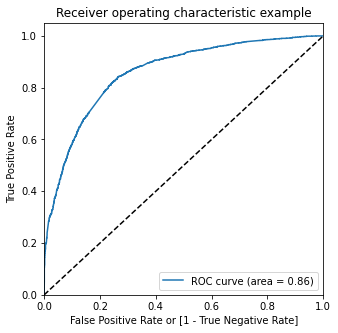

In [113]:
draw_roc(y_train_pred_final.Convertion, y_train_pred_final.Convertion_Prob)

### Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [114]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convertion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convertion,Convertion_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.481068,4170,0,1,1,1,1,1,0,0,0,0,0
1,1,0.753564,6812,1,1,1,1,1,1,1,1,1,0,0
2,1,0.494731,7717,0,1,1,1,1,1,0,0,0,0,0
3,0,0.171749,207,0,1,1,0,0,0,0,0,0,0,0
4,0,0.104120,2044,0,1,1,0,0,0,0,0,0,0,0


In [115]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Convertion, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.480045  1.000000  0.000000
0.1   0.1  0.561883  0.988790  0.167745
0.2   0.2  0.677803  0.947221  0.429064
0.3   0.3  0.763004  0.884166  0.651143
0.4   0.4  0.785874  0.826716  0.748167
0.5   0.5  0.774215  0.701074  0.841742
0.6   0.6  0.760762  0.631014  0.880552
0.7   0.7  0.736099  0.541336  0.915912
0.8   0.8  0.697309  0.424101  0.949547
0.9   0.9  0.649327  0.288650  0.982320


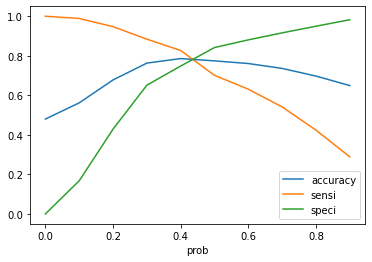

In [116]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [117]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convertion_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Convertion,Convertion_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.481068,4170,0,1,1,1,1,1,0,0,0,0,0,1
1,1,0.753564,6812,1,1,1,1,1,1,1,1,1,0,0,1
2,1,0.494731,7717,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.171749,207,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.104120,2044,0,1,1,0,0,0,0,0,0,0,0,0


In [118]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Convertion, y_train_pred_final.final_predicted)

0.7858744394618834

In [119]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Convertion, y_train_pred_final.final_predicted )
confusion2

array([[1735,  584],
       [ 371, 1770]], dtype=int64)

In [120]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [121]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8267164876226063

In [122]:
# Let us calculate specificity
TN / float(TN+FP)

0.7481673134971971

In [123]:
# Calculate false postive rate - predicting Convertion when Prospects does not have Converted
print(FP/ float(TN+FP))

0.25183268650280294


In [124]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7519116397621071


In [125]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8238366571699905


## Precision and Recall

In [126]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Convertion, y_train_pred_final.predicted )
confusion

array([[1952,  367],
       [ 640, 1501]], dtype=int64)

##### Precision
TP / TP + FP

In [127]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8035331905781584

##### Recall
TP / TP + FN

In [128]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7010742643624475

### Precision and recall tradeoff

In [129]:
from sklearn.metrics import precision_recall_curve

In [130]:
y_train_pred_final.Convertion, y_train_pred_final.predicted

(0       1
 1       1
 2       1
 3       0
 4       0
        ..
 4455    0
 4456    0
 4457    0
 4458    0
 4459    1
 Name: Convertion, Length: 4460, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 4455    0
 4456    1
 4457    0
 4458    0
 4459    0
 Name: predicted, Length: 4460, dtype: int64)

In [131]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convertion, y_train_pred_final.Convertion_Prob)

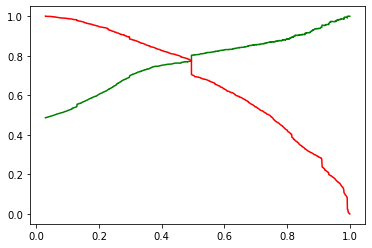

In [132]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Making predictions on the test set

In [133]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Modified,"Specialization_Banking, Investment And Insurance",Specialization_Marketing Management
8402,0,0.007968,0.621479,0.12500,0,0,0,0,0,0,0,0,1,1,0,0
8782,0,0.019920,0.246039,0.31250,1,0,0,0,0,0,1,0,1,1,0,0
6199,0,0.011952,0.414613,0.09375,1,0,0,0,0,0,0,0,1,0,0,0
6482,0,0.000000,0.000000,0.00000,0,1,0,0,0,0,0,0,1,0,0,0
6026,0,0.000000,0.000000,0.00000,0,0,1,0,0,0,0,0,1,0,0,0


In [134]:
X_test_sm = sm.add_constant(X_test)

In [135]:
y_test_pred = res.predict(X_test_sm)

In [136]:
y_test_pred[:10]

8402    0.651277
8782    0.061175
6199    0.528845
6482    0.494731
6026    0.910245
5991    0.249530
3812    0.463367
6307    0.282363
7344    0.546873
4171    0.064702
dtype: float64

In [137]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [138]:
# Let's see the head
y_pred_1.head()

,0
8402,0.651277
8782,0.061175
6199,0.528845
6482,0.494731
6026,0.910245


In [139]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [140]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [141]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [142]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [143]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,8402,0.651277
1,0,8782,0.061175
2,1,6199,0.528845
3,1,6482,0.494731
4,1,6026,0.910245


In [144]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convertion_Prob'})

In [145]:
y_pred_final.head(20)

,Converted,Prospect ID,Convertion_Prob
0,1,8402,0.651277
1,0,8782,0.061175
2,1,6199,0.528845
3,1,6482,0.494731
4,1,6026,0.910245
5,1,5991,0.249530
6,0,3812,0.463367
7,0,6307,0.282363
8,0,7344,0.546873
9,1,4171,0.064702


In [146]:
y_pred_final['final_predicted'] = y_pred_final.Convertion_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [147]:
y_pred_final.head()

,Converted,Prospect ID,Convertion_Prob,final_predicted
0,1,8402,0.651277,1
1,0,8782,0.061175,0
2,1,6199,0.528845,1
3,1,6482,0.494731,1
4,1,6026,0.910245,1


In [148]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7798117154811716

In [149]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[736, 252],
       [169, 755]], dtype=int64)

In [150]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [151]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8170995670995671

In [152]:
# Let us calculate specificity
TN / float(TN+FP)

0.7449392712550608

In [153]:
# Calculate false postive rate - predicting Convertion when Prospects does not have Converted
print(FP/ float(TN+FP))

0.2550607287449393


In [154]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7497517378351539


In [155]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8132596685082873
